# Matplotlib Assignment

### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

**Data.**

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

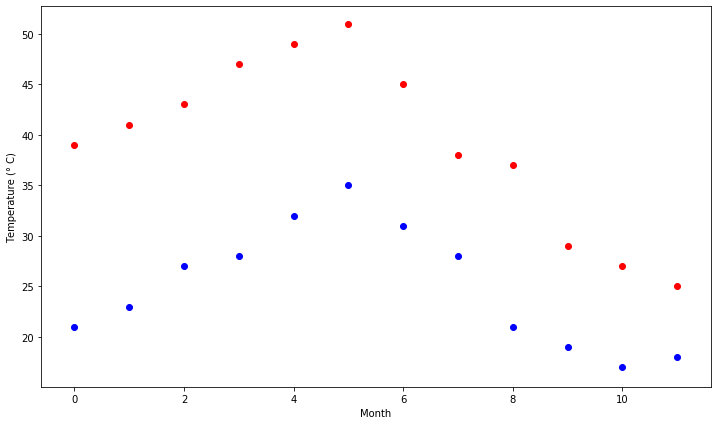

In [2]:
import matplotlib.pyplot as plt

months = np.arange(12)
plt.figure(figsize = (12, 7))
plt.scatter(months, max_temp, color = 'r')
plt.scatter(months, min_temp, color = 'b')
plt.xlabel('Month')
plt.ylabel("Temperature (\u00B0 C)")
plt.show()

### Task:

**1. Fitting it to the periodic function**

In [3]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

**2. Plot the fit**

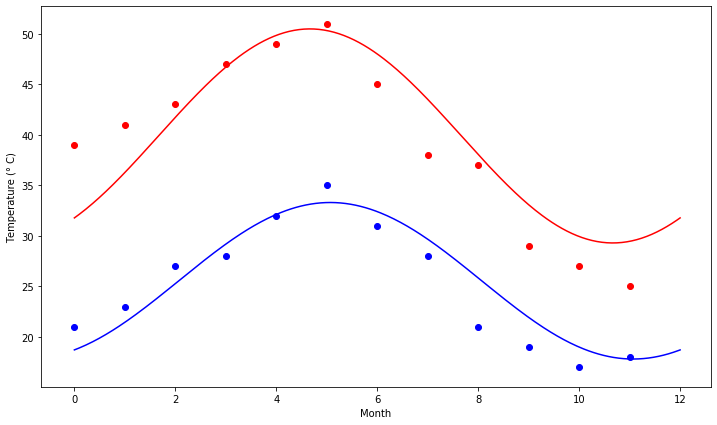

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize = (12, 7))
plt.scatter(months, max_temp, color = 'r')
plt.plot(days, yearly_temps(days, *res_max), 'r')
plt.scatter(months, min_temp, color = 'b')
plt.plot(days, yearly_temps(days, *res_min), 'b')
plt.xlabel('Month')
plt.ylabel("Temperature (\u00B0 C)")
plt.show()

### This assignment is for visualization using matplotlib:

**Data to use: https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv**

In [5]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [6]:
titanic.head(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"


**1. Create a pie chart presenting the male/female proportion**

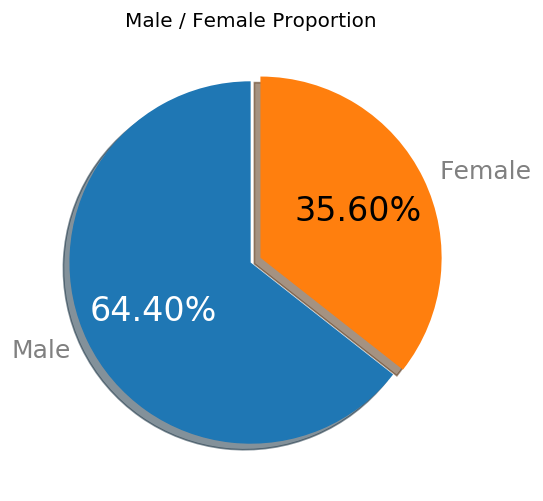

In [7]:
values = titanic.sex.value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 120)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   explode = explode, startangle = 90)
plt.setp(texts, color = 'grey', size = 15)
plt.setp(autotexts, color = 'white', size = 20)
autotexts[1].set_color('k')
plt.title('Male / Female Proportion')
plt.show()

**2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

In [10]:
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

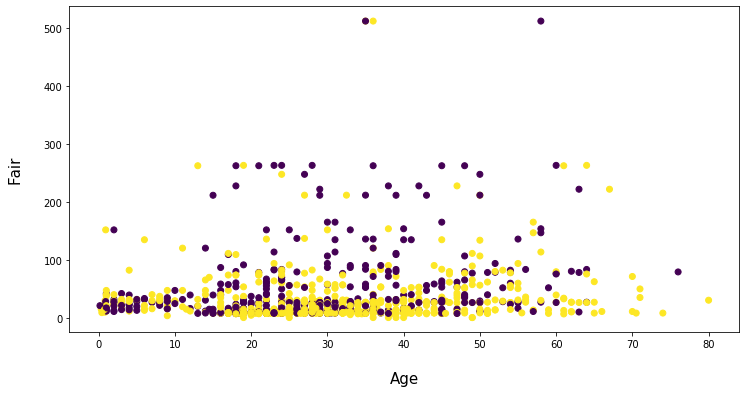

In [13]:
plt.figure(figsize = (12, 6))
plt.scatter(titanic.age, titanic.fare, c = gender)
plt.xlabel('\nAge', fontsize = 15)
plt.ylabel('Fair\n', fontsize = 15)
plt.show()